
### Exercise 1: Load and Prepare Data

**Task:**
- Load the Iris dataset using sklearn and select only the two classes: `Setosa` and `Versicolor`. (Done)
- Separate features (X) and labels (y). (Done)
- Normalize the features so that all values are between 0 and 1.
- Split the data into training and testing sets (80% training, 20% testing).



In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Select only two classes (Setosa and Versicolor)
data = data[data['target'] != 2]

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X, y = datasets.make_classification(
    n_samples=len(X),
    n_features=X.shape[1] + 3,
    n_informative=X.shape[1] + 1,
    n_redundant=2,
    n_clusters_per_class=2,
    random_state=42
)

*Explanation*
1. Using MinMaxScaler for scaling the y amounts to be in [0, 1]
2. Spliting the normalized X and y to train and test, in which the test size is 20% of the dataset


In [2]:
# Your code here for Exercise 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


### Exercise 2: Implement Logistic Regression

**Task:**
- Implement a two-class logistic regression model using NumPy.
- The model should include:
  - A **sigmoid function** to transform the output into a probability.
  - **Cross-entropy loss** to evaluate the performance of the model.
  - Use **gradient descent** to update weights and biases to minimize the loss.

**Instructions:**
- Initialize weights and bias to zeros.
- Train the model for a specified number of epochs.
- Track the training and testing loss in each iteration.
- Plot the loss for both training and testing data.

*Write your code below:*



In [ ]:
class Logistic_Regression:
    def __init__(self, features_num, epochs_num, lr):
        self.weights = np.zeros((features_num, 1))
        self.bias = 0
        self.epochs_num = epochs_num
        self.lr = lr

    def sigmoid(self, z):
        return 1/ (1 + np.exp(-z))

    def cross_entropy_loss(self, y_pred, y_true, m):
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def forward(self, X, y, weight, bias):
        z = np.dot(weight.T, X.T) + bias
        a = self.sigmoid(z)
        return a

    def propagate(self, X, y, weight, bias):
        X = X.T
        z = np.dot(weight.T, X) + bias
        a = self.sigmoid(z)
        m = X.shape[1]
        cost = self.cross_entropy_loss(a, y, m)
        dw = 1/m * np.dot(X, (a-y).T)
        db = 1/m * np.sum(a-y)
        return dw, db, cost

    def gradient_descent(self, X, y):
        weights = self.weights
        bias = self.bias
        final_costs = []
        for i in range(self.epochs_num):
            dw, db, cost = self.propagate(X, y, weights, bias)
            weights -= self.lr * dw
            bias -= self.lr * db
            final_costs.append(cost)
        return weights, bias, final_costs

    def predict(self, X, y, weight, bias):
        predictions = self.forward(X, y, weight, bias)
        predictions = (predictions > 0.5).astype(int)
        return predictions


In [ ]:
num_features = X_train.shape[1]
num_epochs = 10000
learning_rate = 0.1
logistic_regression = Logistic_Regression(num_features, num_epochs, learning_rate)
logistic_weights, logistic_bias, train_costs = logistic_regression.gradient_descent(X_train, y_train)


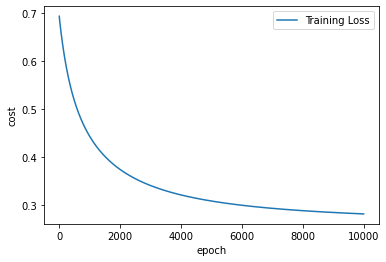

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_costs, label='Training Loss')
# plt.plot(epochs, test_costs, label='Test Loss')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend()
plt.show()


### Exercise 3: Implement a Two-Layer Neural Network

**Task:**
- Implement a simple two-layer neural network using NumPy.
- The network should include:
  - An **input layer**, a **hidden layer** with ReLU activation, and an **output layer** with a sigmoid activation.
  - Use **cross-entropy loss** for training.
  - Train the model using **gradient descent** and update weights for both layers.

**Instructions:**
- Initialize weights for both layers randomly.
- Use the **ReLU** function as the activation function for the hidden layer.
- Use **backpropagation** to compute gradients and update weights.

*Write your code below:*



In [ ]:
class Neural_Network:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate, epochs):
        np.random.seed(1)
        w1 = np.random.rand(hidden_dim, input_dim)
        w2 = np.random.rand(output_dim, hidden_dim)
        self.weight = [w1, w2]
        b1 = np.zeros((hidden_dim, 1))
        b2 = np.zeros((output_dim, 1))
        self.bias = [b1, b2]
        self.lr = learning_rate
        self.epoch_num = epochs

    def relu(self, z):
        return np.maximum(0, z)

    def sigmoid(self, z):
        return 1/ (1 + np.exp(-z))

    def relu_derivation(self, z):
        return (z > 0) * float(1)

    def cross_entropy_loss(self, y_pred, y_true, m):
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def forward(self, X, y, weight, bias):
        z1 = np.dot(weight[0], X.T) + bias[0]   # (hidden_dim, 80)
        a1 = self.relu(z1)

        z2 = np.dot(weight[1], a1) + bias[1]    # (1, 80)
        a2 = self.sigmoid(z2)
        # forward_outs = {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2}
        return z1, a1, z2, a2

    def backpropagation(self, X, y, weight, bias, z1, a1, z2, a2):
        m = X.shape[0]
        # z1, a1, z2, a2 = forward_outs['z1'], forward_outs['a1'], forward_outs['z2'], forward_outs['a2']

        dz2 = a2 - y                    # (1, 80)
        dw2 = 1/m * np.dot(dz2, a1.T)   # (1, hidden_dim)
        db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)

        da1 = np.dot(weight[1].T, dz2)  # (hidden_dim, 80)
        dz1 = da1 * self.relu_derivation(z1)

        dw1 = 1/m * np.dot(dz1, X)      # (hidden_dim, input_dim)
        db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)

        return dw1, db1, dw2, db2

    def update_parameter(self, dw1, db1, dw2, db2):
        self.weight[0] -= self.lr * dw1
        self.weight[1] -= self.lr * dw2
        self.bias[0] -= self.lr * db1
        self.bias[1] -= self.lr * db2

    def fit(self, X, y):
        weight = self.weight
        bias = self.bias
        costs = []
        for i in range(self.epoch_num):
            z1, a1, z2, a2 = self.forward(X, y, weight, bias)
            # print(a2.shape)
            cost = self.cross_entropy_loss(a2, y, X.shape[0])
            # print(cost)
            dw1, db1, dw2, db2 = self.backpropagation(X, y, weight, bias, z1, a1, z2, a2)
            self.update_parameter(dw1, db1, dw2, db2)
            costs.append(cost)
            # print(cost)
        return costs, self.weight, self.bias

    def predict(self, X, y, weight, bias):
        _, _, _, predictions = self.forward(X, y, weight, bias)
        predictions = (predictions > 0.5).astype(int)
        return predictions



In [ ]:
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 1
num_epochs = 10000
learning_rate = 0.0001
nn = Neural_Network(input_dim, hidden_dim, output_dim, learning_rate, num_epochs)
train_costs, nn_weight, nn_bias = nn.fit(X_train, y_train)
# test_costs = nn.fit(X_test, y_test)
# preds = nn.predict(X_test, y_test, weight, bias)
# print(preds)
# print(y_test)
# nn.get_score(preds, y_test)


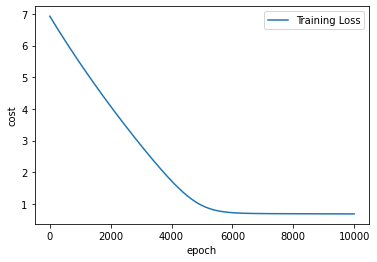

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_costs, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend()
plt.show()


### Exercise 4: Evaluate Models

**Task:**
- After training the logistic regression and neural network models, evaluate their performance on the test set.
- Calculate the following metrics:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1 Score**

**Instructions:**
- Compare the performance of the logistic regression model and the two-layer neural network.

*Write your code below:*



In [ ]:
def evaluate(y_pred, y_true):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f'accuracy: \t{accuracy:0.2f}')
    print(f'precision: \t{precision:0.2f}')
    print(f'recall: \t{recall:0.2f}')
    print(f'f1_score: \t{f1_score:0.2f}')

In [ ]:
logistic_predictions = logistic_regression.predict(X_test, y_test, logistic_weights, logistic_bias)
print('\tEvaluting Logistic Regression Model')
evaluate(logistic_predictions, y_test)

nn_predictions = nn.predict(X_test, y_test, nn_weight, nn_bias)
print('\n\tEvaluting Neural Network Model')
evaluate(nn_predictions, y_test)

	Evaluting Logistic Regression Model
accuracy: 	0.90
precision: 	0.80
recall: 	1.00
f1_score: 	0.89

	Evaluting Neural Network Model
accuracy: 	0.35
precision: 	0.33
recall: 	0.62
f1_score: 	0.43


### Exercise 5: Validation of derivation formulas

*Write your code below:*


In [106]:
# Your code here for Exercise 5
import numpy as np

def loss(x):
    return x**3 + x**2

def analytical_gradient(x):
    return 3 * (x **2) + 2 * x

In [116]:
w = 1.0
learning_rate = 0.01
num_steps = 20

w_values = []
analytical_gradients = []
numerical_gradients = []
for step in range(num_steps):
    grad_analytical  = analytical_gradient(w)
    w_values.append(w)
    analytical_gradients.append(grad_analytical)

    w = w - learning_rate * grad_analytical

    grad_numerical = (loss(w + 1e-5) - loss(w - 1e-5)) / (2 * 1e-5)
    numerical_gradients.append(grad_numerical)


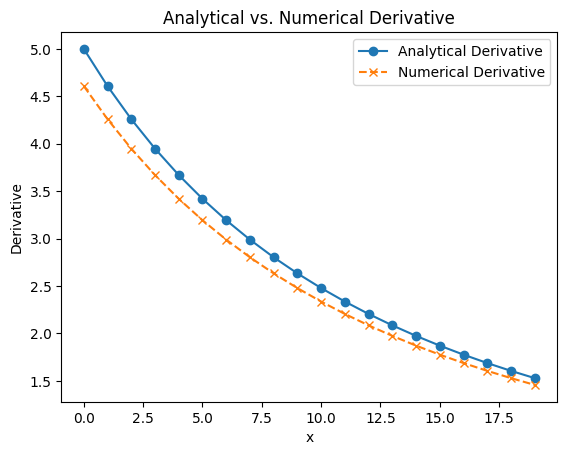

In [117]:
plt.plot(range(num_steps), analytical_gradients, label="Analytical Derivative", marker='o')
plt.plot(range(num_steps), numerical_gradients, label="Numerical Derivative", linestyle='--', marker='x')
plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Analytical vs. Numerical Derivative")
plt.legend()
plt.show()

### Exercise 6: Implement MLP using Keras or Pytorch

**Task:**
- Use Keras or Pytorch to implement MLP
- It should have multiple hidden layers with ReLU function and one output layer wuth Sigmoid function

*Write your code below:*


In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, experiment=None):
        super(MLP, self).__init__()
        if experiment is None:
            self.layer1 = nn.Linear(input_dim, 512)
            self.layer2 = nn.Linear(512, 256)
            self.dropout1 = nn.Dropout(0.3)
            self.layer3 = nn.Linear(256, 512)
            self.dropout2 = nn.Dropout(0.3)
            self.layer4 = nn.Linear(512, 256)
            self.layer5 = nn.Linear(256, 512)
            self.dropout3 = nn.Dropout(0.3)
            self.layer6 = nn.Linear(512, 256)
            self.layer6 = nn.Linear(512, 256)
            self.output = nn.Linear(256, output_dim)
        else:
            print('hi')
            self.layer1 = nn.Linear(input_dim, experiment.get_parameter('hidden-layer1'))
            self.layer2 = nn.Linear(experiment.get_parameter('hidden-layer1'), experiment.get_parameter('hidden-layer2'))
            # self.dropout = nn.Dropout(0.5)
            self.layer3 = nn.Linear(experiment.get_parameter('hidden-layer2'), experiment.get_parameter('hidden-layer3'))
            self.layer4 = nn.Linear(experiment.get_parameter('hidden-layer3'), experiment.get_parameter('hidden-layer4'))
            self.layer5 = nn.Linear(experiment.get_parameter('hidden-layer4'), experiment.get_parameter('hidden-layer5'))
            self.layer6 = nn.Linear(experiment.get_parameter('hidden-layer5'), experiment.get_parameter('hidden-layer6'))
            self.layer7 = nn.Linear(experiment.get_parameter('hidden-layer6'), experiment.get_parameter('hidden-layer7'))
            self.output = nn.Linear(experiment.get_parameter('hidden-layer7'), output_dim)
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = self.dropout1(x)
        x = torch.relu(self.layer3(x))
        # x = self.dropout2(x)
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        # x = self.dropout3(x)
        x = torch.relu(self.layer6(x))
        x = torch.relu(self.layer7(x))
        return torch.sigmoid(self.output(x))



### Exercise 7, 8: Plot Loss and Experiment with Hyperparameters using Comet.ml and Weights & Biases (WandB)

**Task:**
- Plot the loss values for both training and testing data across all epochs.
- Experiment with different **hyperparameters** such as:
  - The number of neurons in the hidden layer.
  - The **learning rate**.
  - The number of **epochs**.
- Track your experiments using **Comet.ml** and **Weights & Biases** to better visualize and compare results.

**Instructions:**
- Use `matplotlib` to plot the loss values.
- Use `comet_ml` and `wandb` to log your experiments and results.
- Experiment with different configurations and document your observations.
- Track metrics such as loss, accuracy, precision, recall, and F1 score for each experiment.

**Note:**
- Make sure to initialize `Experiment` from Comet.ml with your API key.
- Initialize `wandb` for logging each experiment and log the required metrics.

*Write your code below:*



#### Part 7: Plot Loss and Experiment with Hyperparameters

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def preprocess_data(X_train, y_train, X_test, y_test, batch_size=None):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True) if batch_size is not None else DataLoader(train_data, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True) if batch_size is not None else DataLoader(test_data, batch_size=16, shuffle=True)

    return train_loader, test_loader

def train_model(model, train_loader, epochs, comet=None, wandb=None):
    training_loss = []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inps, labels in train_loader:
            model.zero_grad()
            labels = labels.unsqueeze(1)
            output = model(inps)
            loss = bce_criterian(output, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = (total_loss/len(train_loader))
        training_loss.append(avg_loss)
        if comet is not None:
            comet.log_metric('train_loss', avg_loss, step=epoch)
        if wandb is not None:
            wandb.log({
                "train_loss": avg_loss,
            })
    return training_loss

def validate_model(model, test_loader, epochs, comet=None, wandb=None):
    validation_loss = []
    y_true = []
    y_pred = []
    patience = 8
    best_val_loss = float("inf")
    epochs_no_improve = 0
    for epoch in range(epochs):
        model.eval()
        total_loss = 0
        with torch.no_grad():
            for inps, labels in test_loader:
                labels = labels.unsqueeze(1)
                output = model(inps)
                loss = bce_criterian(output, labels)
                total_loss += loss.item()
                if comet is not None:
                    preds = torch.round(torch.sigmoid(output))
                    y_true.extend(labels.cpu().numpy())
                    y_pred.extend(preds.cpu().numpy())

        avg_loss = (total_loss/len(test_loader))
        validation_loss.append(avg_loss)
        scheduler.step(avg_loss)

        if avg_loss < best_val_loss:
            best_val_loss = avg_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print("Early stopping")
            model.load_state_dict(best_model_state)
            break

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        if comet is not None:
            comet.log_metric('val_loss', avg_loss, step=epoch)
            comet_experiment.log_metric("accuracy", accuracy, step=epoch)
            comet_experiment.log_metric("precision", precision, step=epoch)
            comet_experiment.log_metric("recall", recall, step=epoch)
            comet_experiment.log_metric("f1_score", f1, step=epoch)

        if wandb is not None:
            wandb.log({
                "val_loss": avg_loss,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1_score": f1,
                "epoch": epoch
            })
    return validation_loss

def plot_loss(training_loss, validation_loss):
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Over Epochs')
    plt.show()

In [96]:
learning_rate = 0.0001
epochs = 100
weight_decay = 1e-3
model = MLP(
        input_dim = X_train.shape[1],
        output_dim = 1
    )
bce_criterian = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.1, verbose=True)

train_loader, test_loader = preprocess_data(X_train, y_train, X_test, y_test)
training_losses = train_model(model, train_loader, epochs)
validation_losses = train_model(model, test_loader, epochs)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


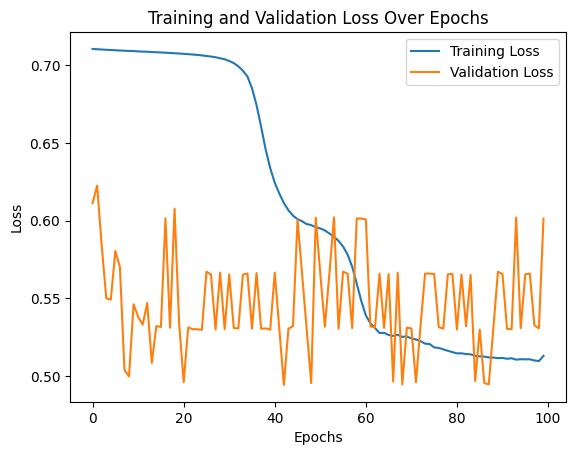

In [81]:
plot_loss(training_losses, validation_losses)

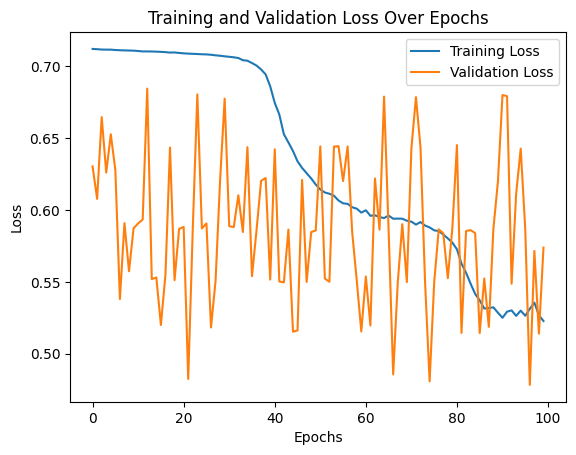

In [89]:
plot_loss(training_losses, validation_losses)


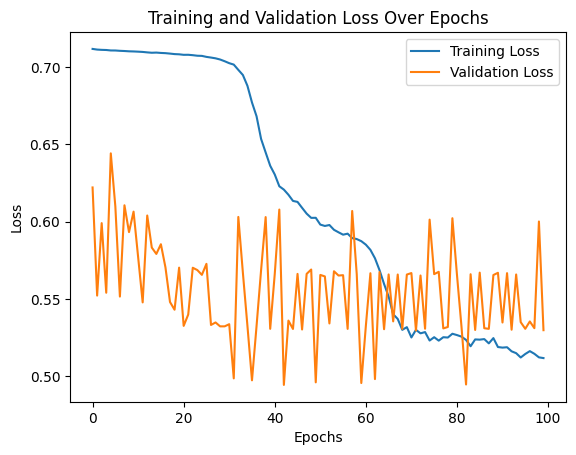

In [93]:
plot_loss(training_losses, validation_losses)

Model Structure:

            
            self.layer1 = nn.Linear(input_dim, 8)
            self.layer2 = nn.Linear(8, 16)
            self.dropout = nn.Dropout(0.5)
            self.layer3 = nn.Linear(16, 16)
            self.layer4 = nn.Linear(16, 8)
            

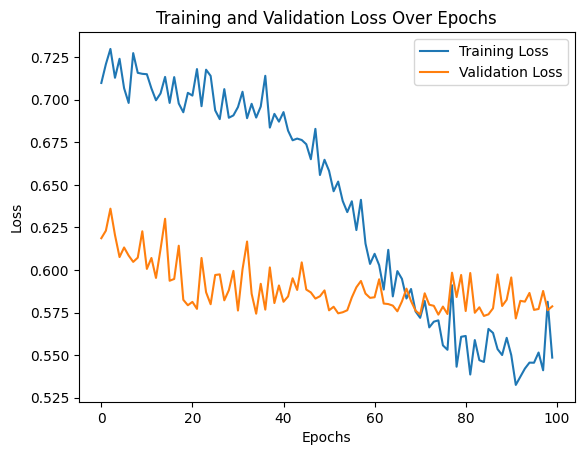

In [19]:
plot_loss(training_losses, validation_losses)

### Hidden layers dimentions:
1. Hidden layer 1: (input_dim, 8)
2. Hidden layer 2: (8, 16)
3. Hidden layer 3: (16, 16)
4. Hidden layer 4: (16, 8)

* Training and Validation Loss with Learning rate = 0.001

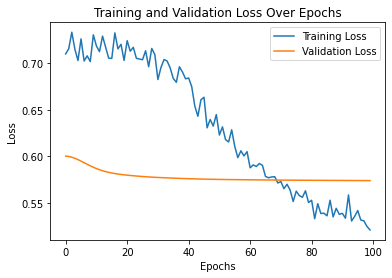

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss with Learning rate = 0.01

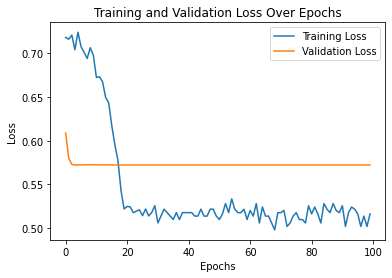

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss with Learning rate = 0.0001

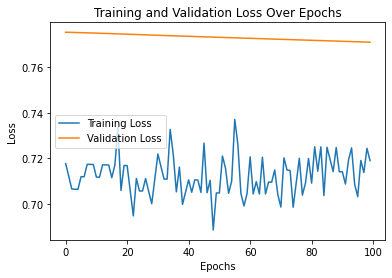

In [ ]:
plot_loss(training_losses, validation_losses)

The model is not showing signs of overfitting based on this plot. It appears to be learning well on both the training and validation data without overfitting

* Training and Validation Loss using Dropout = 0.5

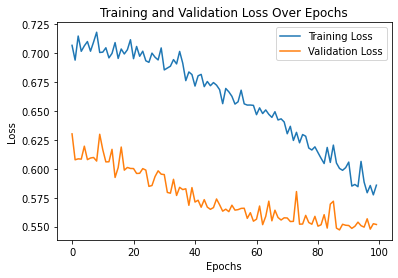

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss using Dropout = 0.3

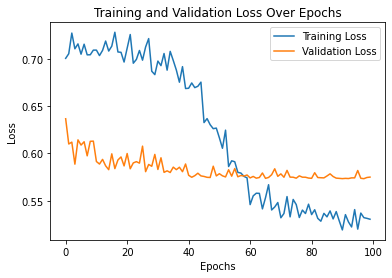

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss using Dropout = 0.8

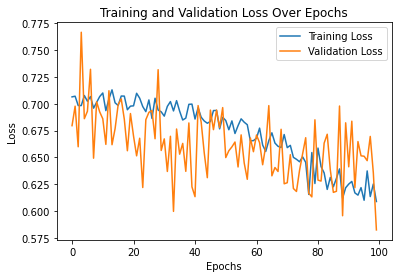

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss using L2 Regularization

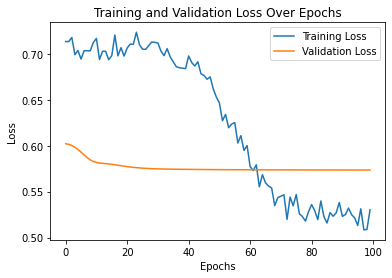

In [ ]:
plot_loss(training_losses, validation_losses)

### Hidden layers dimentions:
1. Hidden layer 1: (input_dim, 8)
2. Hidden layer 2: (8, 32)
3. Hidden layer 3: (16, 64)
4. Hidden layer 4: (16, 8)

* Training and Validation Loss with learning rate = 0.001

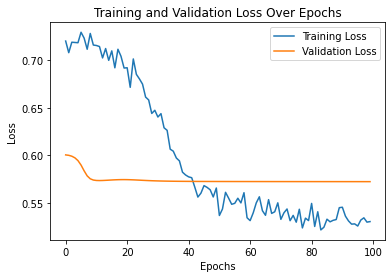

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss with learning rate = 0.01

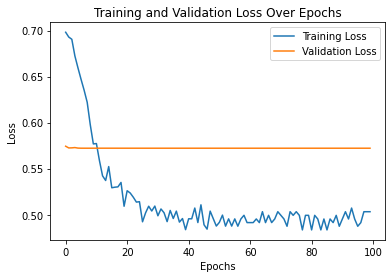

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss with learning rate = 0.0001

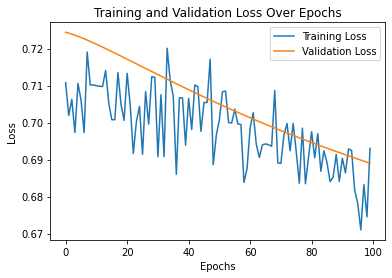

In [ ]:
plot_loss(training_losses, validation_losses)

The above model has problem in converging

* Training and Validation Loss using Dropout = 0.5

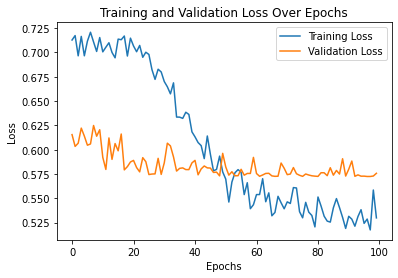

In [ ]:
plot_loss(training_losses, validation_losses)

* Training and Validation Loss using L2 Regularization

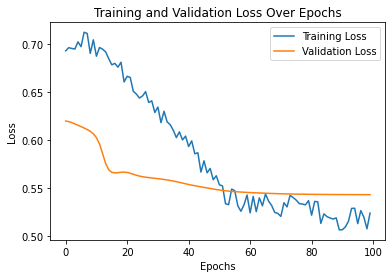

In [ ]:
plot_loss(training_losses, validation_losses)

### Number of hidden layers:
1. Hidden layer 1: (input_dim, 8)
2. Hidden layer 2: (8, 32)
3. Hidden layer 3: (16, 8)

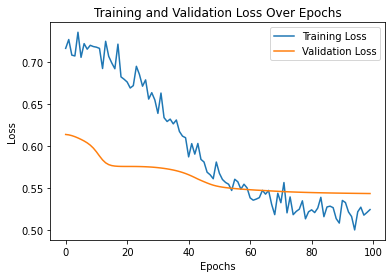

In [ ]:
plot_loss(training_losses, validation_losses)

### Number of hidden layers:
1. Hidden layer 1: (input_dim, 8)
2. Hidden layer 2: (8, 32)
3. Hidden layer 3: (16, 64)
4. Hidden layer 4: (16, 8)
5. Hidden layer 5: (8, 8)

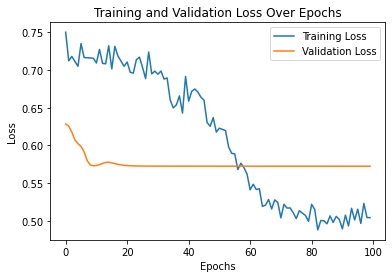

In [ ]:
plot_loss(training_losses, validation_losses)

### Exercise 8: Experiment with Hyperparameters using Comet.ml and Weights & Biases (WandB)


In [7]:
!pip install comet_ml
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.1/697.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 968.1/968.1 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 8.2 MB/s eta 0:00:00
  Created wheel for configobj: filename=configobj-5.0.9-py2.py3-none-any.whl size=35615 sha256=798b6850af3d8d2ef1b73f8e2238c2108d21579723eba10aa4c7ec706a415918
  Stored in directory: /root/.cache/pip/wheels/a1/6c/03/6c5e3cf1a6e4b9e2fc5c4409be4abc5a8268bd9c878739cb32
Successfully built configobj
  Attempting uninstall: python-box
    Found existing installation: python-box 7.2.0
    Uninstalling python-box-7.2.0:
      Successfully uninstalled python-box-7.2.0


In [ ]:
# hyperparameters = [
#     {'hidden_dim1': 8, 'hidden_dim2': 16, 'hidden_dim3': 16, 'hidden_dim1': 8, 'lr': 0.001, 'epochs': 100 },
#     {'hidden_dim1': 8, 'hidden_dim2': 32, 'hidden_dim3': 16, 'hidden_dim1': 8, 'lr': 0.001, 'epochs': 100 },
#     {'hidden_dim1': 8, 'hidden_dim2': 16, 'hidden_dim3': 16, 'hidden_dim1': 8, 'lr': 0.001, 'epochs': 1000 },
#     {'hidden_dim1': 8, 'hidden_dim2': 16, 'hidden_dim3': 16, 'hidden_dim1': 8, 'lr': 0.01, 'epochs': 1000 },
# ]

In [23]:
config = {
    "algorithm": "bayes",
    "name": "MLP",
    "spec": {
        "maxCombo": 5,
        "objective": "minimize",
        "metric": "loss"
    },
    "parameters": {
        "learning-rate": {
            "type": "float",
            "min": 0.001,
            "max": 1.0,
            "scalingType": "loguniform"
        },

        "weight-decay": {
            "type": "float",
            "min": 1e-5,
            "max": 1e-2,
            "scalingType": "loguniform"
        },

        "batch-size": {
            "type": "discrete",
            "values": [32, 64, 128]
        },

        "epochs": {
            "type": "integer",
            "min": 10,
            "max": 100
        },

        'hidden-layer1':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer2':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer3':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer4':{
            "type": "integer",
            "min": 16,
            "max": 128
        }

    },
    "trials": 1
}

In [34]:
import comet_ml
from comet_ml import Experiment
import wandb

comet_ml.login(api_key="KR0sZWpUYsxPENtjiIxO9i55Q")
# wandb.login('47b1774568a6d8c276ab49dc3263b77b1fb69cef')

comet = Experiment(
    project_name="MLP_experiment",
    log_code=False,
    )
wandb.init(project="MLP_experiment")

opt = comet_ml.Optimizer(config)

COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : quiet_taping_3501
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment/32f482f534cc46639068ff7c92e76cb8
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [13] : (0

train_loss,█▇▆▅▄▃▃▂▁▂▁▁▃
train_loss,0.59675


COMET INFO: 5de3483b1a944799adf26ff41b06f9d0
COMET INFO: Using optimizer config: {'algorithm': 'bayes', 'configSpaceSize': 'infinite', 'endTime': None, 'id': '5de3483b1a944799adf26ff41b06f9d0', 'lastUpdateTime': None, 'maxCombo': 5, 'name': 'MLP', 'parameters': {'batch-size': {'type': 'discrete', 'values': [32, 64, 128]}, 'epochs': {'max': 100, 'min': 10, 'scalingType': 'uniform', 'type': 'integer'}, 'hidden-layer1': {'max': 128, 'min': 16, 'scalingType': 'uniform', 'type': 'integer'}, 'hidden-layer2': {'max': 128, 'min': 16, 'scalingType': 'uniform', 'type': 'integer'}, 'hidden-layer3': {'max': 128, 'min': 16, 'scalingType': 'uniform', 'type': 'integer'}, 'hidden-layer4': {'max': 128, 'min': 16, 'scalingType': 'uniform', 'type': 'integer'}, 'learning-rate': {'max': 1.0, 'min': 0.001, 'scalingType': 'loguniform', 'type': 'float'}, 'weight-decay': {'max': 0.01, 'min': 1e-05, 'scalingType': 'loguniform', 'type': 'float'}}, 'predictor': None, 'spec': {'gridSize': 10, 'maxCombo': 5, 'metri

In [35]:
for comet_experiment in opt.get_experiments(project_name="MLP_experiment"):
    learning_rate = comet_experiment.get_parameter("learning-rate")
    weight_decay = comet_experiment.get_parameter("weight-decay")
    batch_size = comet_experiment.get_parameter("batch-size")

    wandb_run = wandb.init(project="MLP_experiment")
    wandb_run.config.update({
        "learning_rate": learning_rate,
        "weight_decay": weight_decay,
        "batch_size": batch_size
    })

    model = MLP(
        input_dim= X_train.shape[1],
        output_dim = 1,
        experiment = comet_experiment
        )
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.1, verbose=True)
    bce_criterian = nn.BCEWithLogitsLoss()

    train_loader, validation_loader = preprocess_data(X_train, y_train, X_test, y_test, batch_size)

    train_model(model, train_loader, comet_experiment.get_parameter("epochs"), comet_experiment, wandb)
    validate_model(model, validation_loader, comet_experiment.get_parameter("epochs"), comet_experiment, wandb)


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : mysterious_cement_8242
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment/6386c4130a9f4070932112aa375a1987
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=19lDKc0q1UdydXidmYf9DuW9Lki_zrggd
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     installed packages  : 1
COMET INFO:     os packages         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklear

hi


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : solar_buyout_7223
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment/5d8386108d864bb1949f54dc918fc4ff
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.4
COMET INFO:     f1_score        : 0.5714285714285714
COMET INFO:     precision       : 0.4
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [96] : (0.5120658675829569, 0.742986778418223)
COMET INFO:     val_los

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
f1_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▃▂▃▁▁▂▂▂▂▁▄▂▂▁▁▂▁▁▂▂▂▃▂▂▂▁▁▁▁▂▂▂▂▂▁▂▂▁
val_loss,▃▃▃▆▆▆▆▆▆▁▆▆▁▆▆▃▃▆▆█▆▆▆▃▆▃▃▁▃▆▃▆▆▃▃▃▆▃▆▃
accuracy,0.4
epoch,95
f1_score,0.57143
precision,0.4


hi


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : sensitive_longan_8509
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment/c4c117f274a244189f28ed28b1d2885a
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.4
COMET INFO:     f1_score        : 0.5714285714285714
COMET INFO:     precision       : 0.4
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [93] : (0.671858012676239, 0.7301114499568939)
COMET INFO:     val

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▁▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇████
f1_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▂▄▂▅█▅▂▄▁▃▇▄▃▄▄▅▄▃▂▁▄▄▂▂▂▆▄▂▆▂▂▂▄▁▄▅▅▄
val_loss,█▁▁▁▁▁▁█▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁█▁█▁▁▁▁▁▁▁▁▁▁
accuracy,0.4
epoch,92
f1_score,0.57143
precision,0.4


hi


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
f1_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▆▆▆▆▆▅█▆▆▆▆▆▅▁▆▆▆
val_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.6
epoch,18
f1_score,0
precision,0


hi


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : eerie_lion_3757
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment/406575be838d4cb6a9fa30cf45374da8
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.4
COMET INFO:     f1_score        : 0.5714285714285714
COMET INFO:     precision       : 0.4
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [64] : (0.5388809442520142, 0.7459458112716675)
COMET INFO:     val_loss

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
f1_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▇▇▇▇▆▄▂▃▄▄▂▂▁▂▂▂▂▁▂▁▅▃▂▂▂▂▁▁▃▂▂▁▂▁▁▂▃▂
val_loss,▆▃█▃▃▆▆▃▃▆▃▃▃▃▆▃▃▃▃▃█▃▃▃▁▃▃▃▃▃▃▃▃▃▆▃▆▃▃▆
accuracy,0.4
epoch,63
f1_score,0.57143
precision,0.4


hi


COMET INFO: Optimizer search 5de3483b1a944799adf26ff41b06f9d0 has completed


Images below shows the model's results in Comet and Wandb:

link to provide the comet and wandb projects:
https://www.comet.com/zahrarahimi/mlp-experiment/view/new/panels


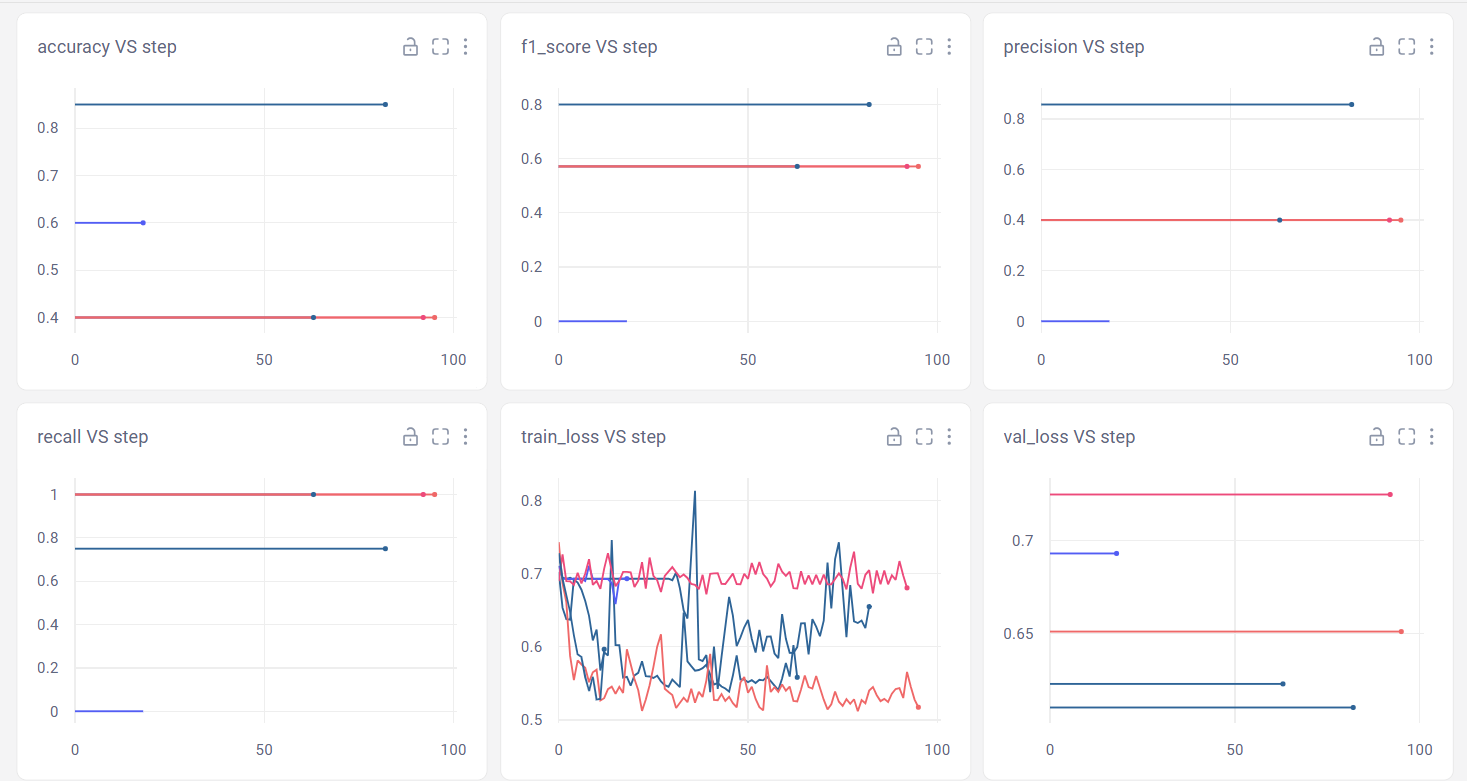

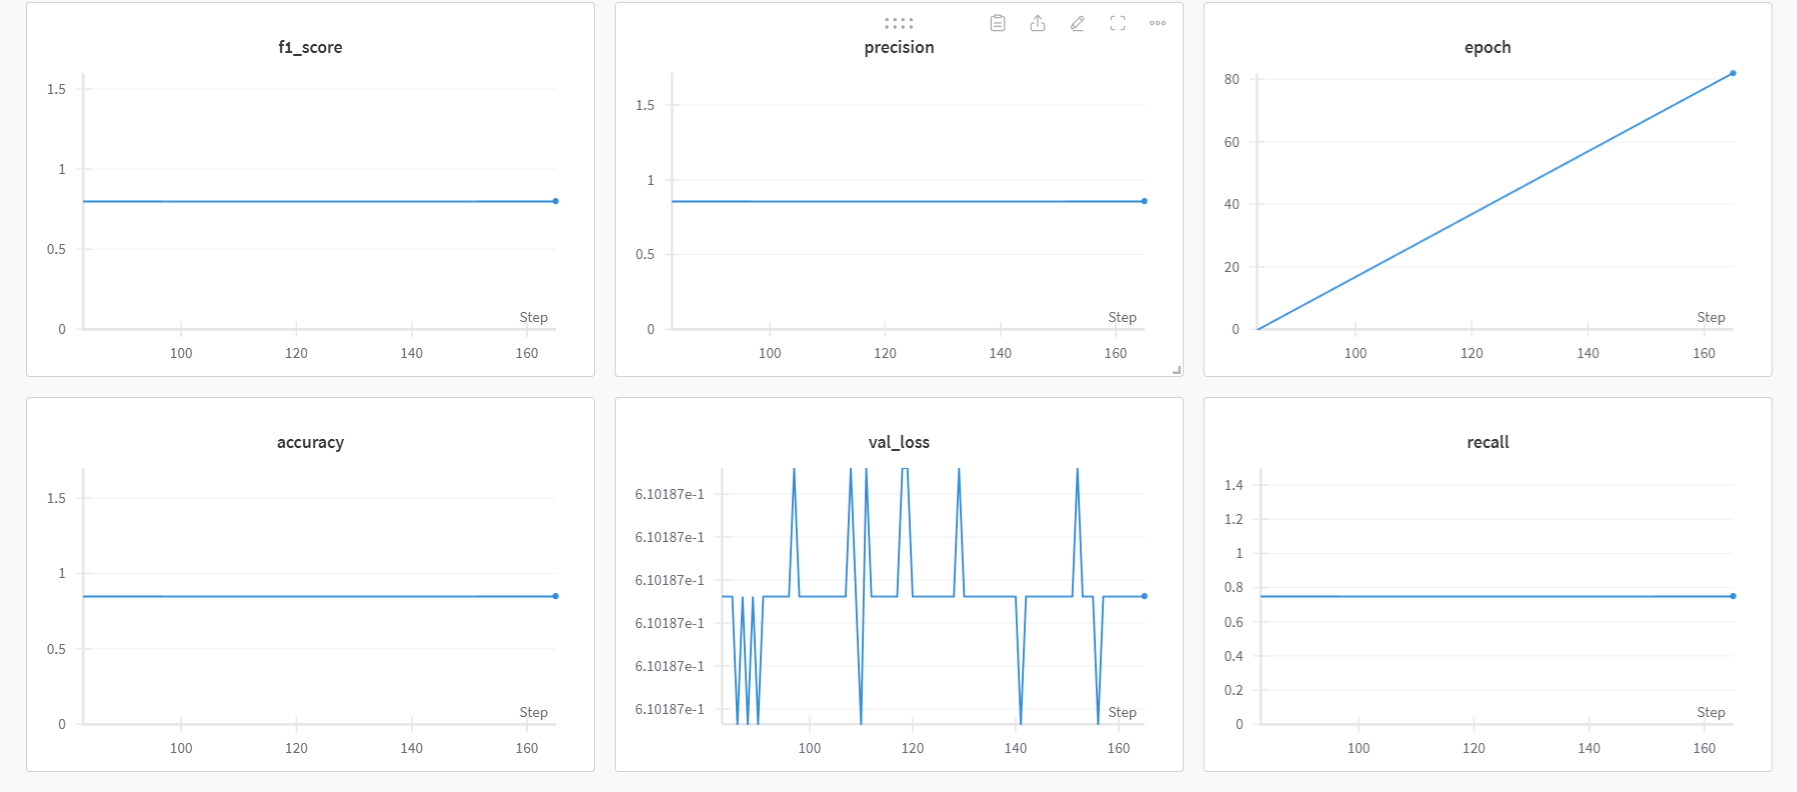

Best Experiment Based on the Training Loss Plot (steady decrease from the beginning)

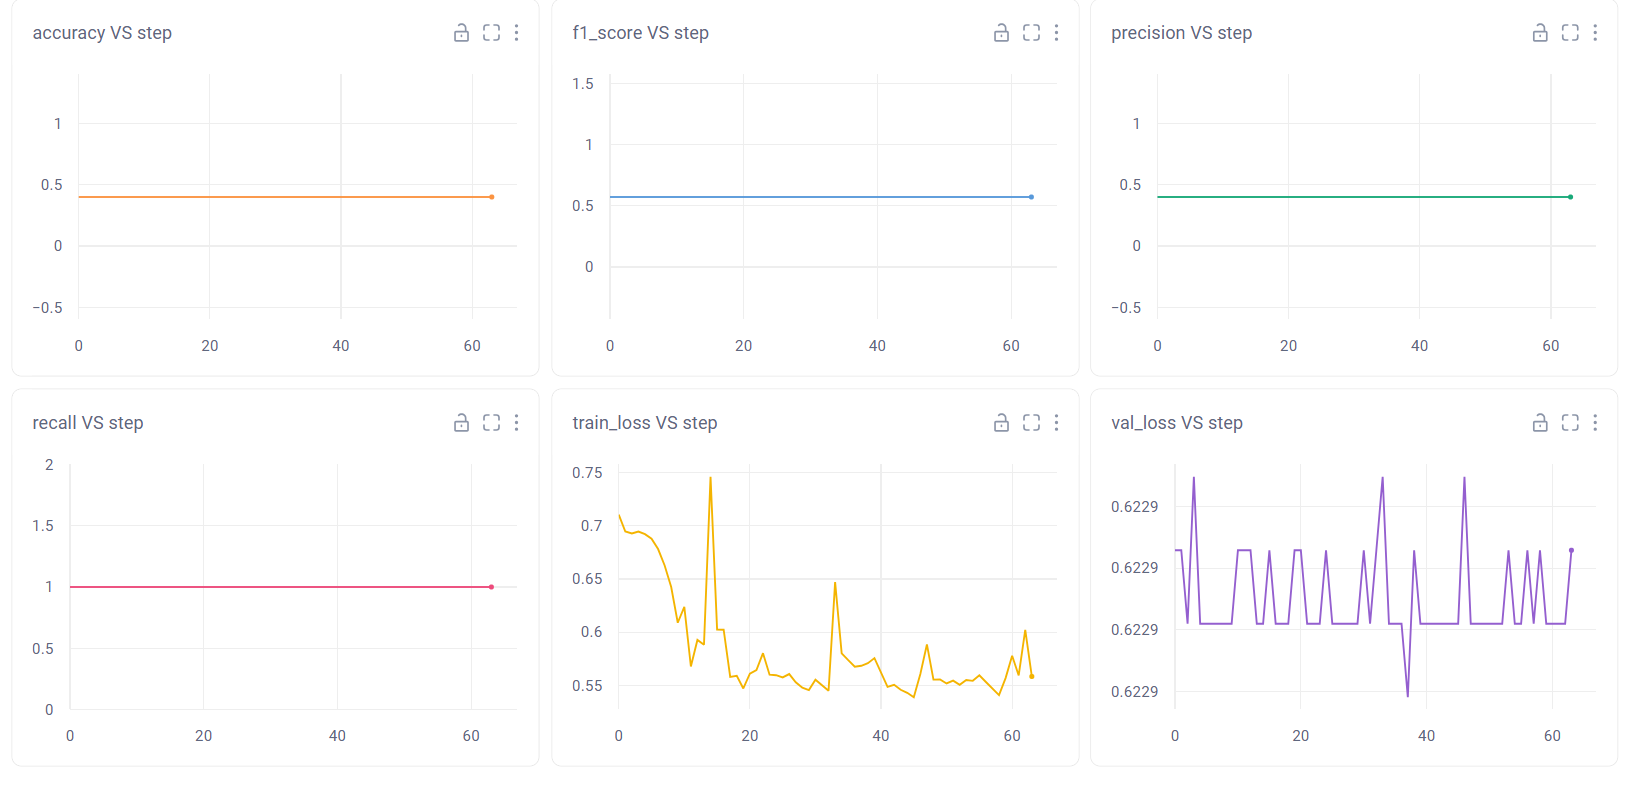

In [ ]:
comet.end()
wandb.finish()

### Exercise 9: Experimenting with Overfitting and Underfitting

Modifying the model structure to encourage overfitting:

            self.layer1 = nn.Linear(input_dim, 512)
            self.layer2 = nn.Linear(512, 256)
            self.layer3 = nn.Linear(256, 128)
            self.layer4 = nn.Linear(128, 64)
            self.output = nn.Linear(64, output_dim)

Overfitted Model

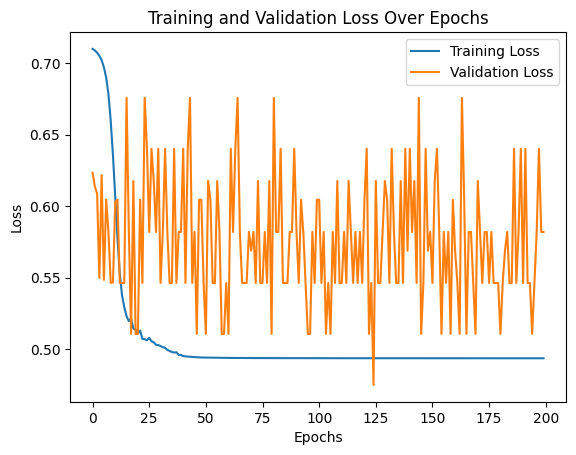

In [72]:
plot_loss(training_losses, validation_losses)

Trying to prevent overfitting using 3 methods:
1. Regularization
2. Dropout
3. Early Stopping


MLP architecture:

            self.layer1 = nn.Linear(input_dim, 512)
            self.layer2 = nn.Linear(512, 256)
            self.dropout1 = nn.Dropout(0.3)
            self.layer3 = nn.Linear(256, 512)
            self.dropout2 = nn.Dropout(0.3)
            self.layer4 = nn.Linear(512, 256)
            self.layer5 = nn.Linear(256, 512)
            self.dropout3 = nn.Dropout(0.3)
            self.layer6 = nn.Linear(512, 256)
            self.layer6 = nn.Linear(512, 256)
            self.output = nn.Linear(256, output_dim)

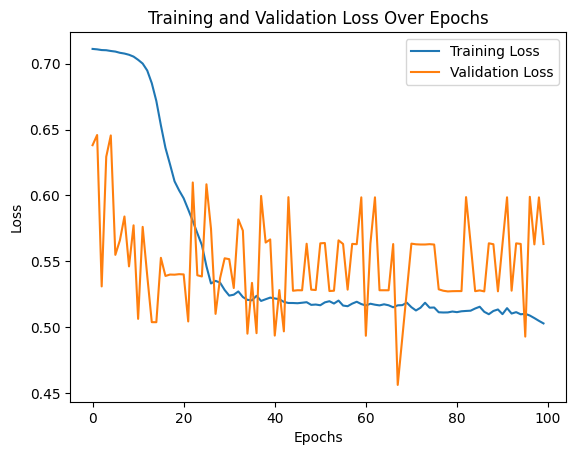

In [ ]:
plot_loss(training_losses, validation_losses)

###Optianals:
1. adding 3 hidden layers to MLP
2. implementing learning rate scheduler

In [99]:
config = {
    "algorithm": "bayes",
    "name": "MLP",
    "spec": {
        "maxCombo": 5,
        "objective": "minimize",
        "metric": "loss"
    },
    "parameters": {
        "learning-rate": {
            "type": "float",
            "min": 0.001,
            "max": 1.0,
            "scalingType": "loguniform"
        },

        "weight-decay": {
            "type": "float",
            "min": 1e-5,
            "max": 1e-2,
            "scalingType": "loguniform"
        },

        "batch-size": {
            "type": "discrete",
            "values": [32, 64, 128]
        },

        "epochs": {
            "type": "integer",
            "min": 10,
            "max": 100
        },

        'hidden-layer1':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer2':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer3':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer4':{
            "type": "integer",
            "min": 16,
            "max": 128
        },

        'hidden-layer5':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer6':{
            "type": "integer",
            "min": 16,
            "max": 128
        },


        'hidden-layer7':{
            "type": "integer",
            "min": 16,
            "max": 128
        }

    },
    "trials": 1
}

In [100]:
import comet_ml
from comet_ml import Experiment
import wandb

comet_ml.login(api_key="KR0sZWpUYsxPENtjiIxO9i55Q")
# wandb.login('47b1774568a6d8c276ab49dc3263b77b1fb69cef')

comet = Experiment(
    project_name="MLP_experiment2",
    log_code=False,
    )

opt = comet_ml.Optimizer(config)

COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : accused_scaffold_1869
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment/5bf1458e395e414aa59a028b17d30c05
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        

In [101]:
for comet_experiment in opt.get_experiments(project_name="MLP_experiment2"):
    learning_rate = comet_experiment.get_parameter("learning-rate")
    weight_decay = comet_experiment.get_parameter("weight-decay")
    batch_size = comet_experiment.get_parameter("batch-size")

    wandb_run = wandb.init(project="MLP_experiment2")
    wandb_run.config.update({
        "learning_rate": learning_rate,
        "weight_decay": weight_decay,
        "batch_size": batch_size
    })

    model = MLP(
        input_dim= X_train.shape[1],
        output_dim = 1,
        experiment = comet_experiment
        )
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)
    bce_criterian = nn.BCEWithLogitsLoss()

    train_loader, validation_loader = preprocess_data(X_train, y_train, X_test, y_test, batch_size)

    train_model(model, train_loader, comet_experiment.get_parameter("epochs"), comet_experiment, wandb)
    validate_model(model, validation_loader, comet_experiment.get_parameter("epochs"), comet_experiment, wandb)


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : charming_bagel_1821
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment2/9acdd798e49b4a2d84772195e16f813d
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=19lDKc0q1UdydXidmYf9DuW9Lki_zrggd
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     installed packages  : 1
COMET INFO:     os packages         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn,

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██
f1_score,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▄▃▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▃█▂▂▁▂▄▄▃▃▂▃▂▃▃▂▃▄▄▅▃▃▃
val_loss,▅▅▁▅▁▅▅▅▅█▅▅▅▅▅█▅▅██▅▅█▅▅▅▅▅▅▅▅▅▅▅█▅▅▅▅▅
accuracy,0.85
epoch,82
f1_score,0.8
precision,0.85714


hi


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.


Early stopping


COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : nervous_dragster_5562
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment2/50f65572e80d463e9cabf3e9264f81fd
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.8
COMET INFO:     f1_score        : 0.8
COMET INFO:     precision       : 0.6666666666666666
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [65] : (0.4713524878025055, 0.7353621423244476)
COMET INFO:  

accuracy,▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▄▅▅▆▇█
f1_score,▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁
train_loss,███▆█▇▇▆▅▆▅▅▄▄▄▄▄▄▄▄▂▂▂▁▂▂▂▂▁▁▂▁▂▁▁▁▂▂▁▁
val_loss,█▁▁▁▁▁▁▁▁
accuracy,0.8
epoch,8
f1_score,0.8
precision,0.66667


hi


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.


Early stopping


COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : gray_blackcurrant_8011
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment2/3ca6be73d5cf432084607a209160543d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.4
COMET INFO:     f1_score        : 0.5714285714285714
COMET INFO:     precision       : 0.4
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [91] : (0.6962407827377319, 0.7126549482345581)
COMET INFO:     val_loss [8]    : (0.732142448425293, 0.7321425080299377)
COMET INFO:   Others:
COMET INFO:  

accuracy,▁▁▁▁▁▁▁▁
epoch,▁▂▃▄▅▆▇█
f1_score,▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁
train_loss,██▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁██▁▁▁▁▁
accuracy,0.4
epoch,7
f1_score,0.57143
precision,0.4


hi


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.


Early stopping


COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : thoughtful_land_6156
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment2/46f8d42f3c86496ea3777dbded18a3a2
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.4
COMET INFO:     f1_score        : 0.5714285714285714
COMET INFO:     precision       : 0.4
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [46] : (0.6814013520876566, 0.7095991174379984)
COMET INFO:   

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
f1_score,▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▇▃▁▅▄█▆▄▅▄▄▄▃▄▃▄▅▃▆▅▃▄▄▃▄▆▇▅▃▄▃▅▆▃▃▂▆▅▅▃
val_loss,█████▁███▁███
accuracy,0.4
epoch,12
f1_score,0.57143
precision,0.4


hi


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.


Early stopping


COMET INFO: Optimizer metrics is 'loss' but no logged values found. Experiment ignored in sweep.
COMET WARNING: Couldn't retrieve and log Google Colab notebook content, reason: 'NoneType' object is not subscriptable
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : popular_ape_2897
COMET INFO:     url                   : https://www.comet.com/zahrarahimi/mlp-experiment2/b68b6fd7be484398a57793dd5f4c179d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy        : 0.4
COMET INFO:     f1_score        : 0.5714285714285714
COMET INFO:     precision       : 0.4
COMET INFO:     recall          : 1.0
COMET INFO:     train_loss [49] : (0.6930164098739624, 0.7139283418655396)
COMET INFO:     va

accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
f1_score,▁▁▁▁▁▁▁▁▁▁
precision,▁▁▁▁▁▁▁▁▁▁
recall,▁▁▁▁▁▁▁▁▁▁
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃
val_loss,▅█▁▅▁▅▅▅▅▁
accuracy,0.4
epoch,9
f1_score,0.57143
precision,0.4


hi


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
COMET INFO: Optimizer search 0bf2c10fdc94413e967e443fa57f12be has completed


Early stopping


Images below shows the model's results in Comet and Wandb:
https://www.comet.com/zahrarahimi/mlp-experiment2/view/new/panels

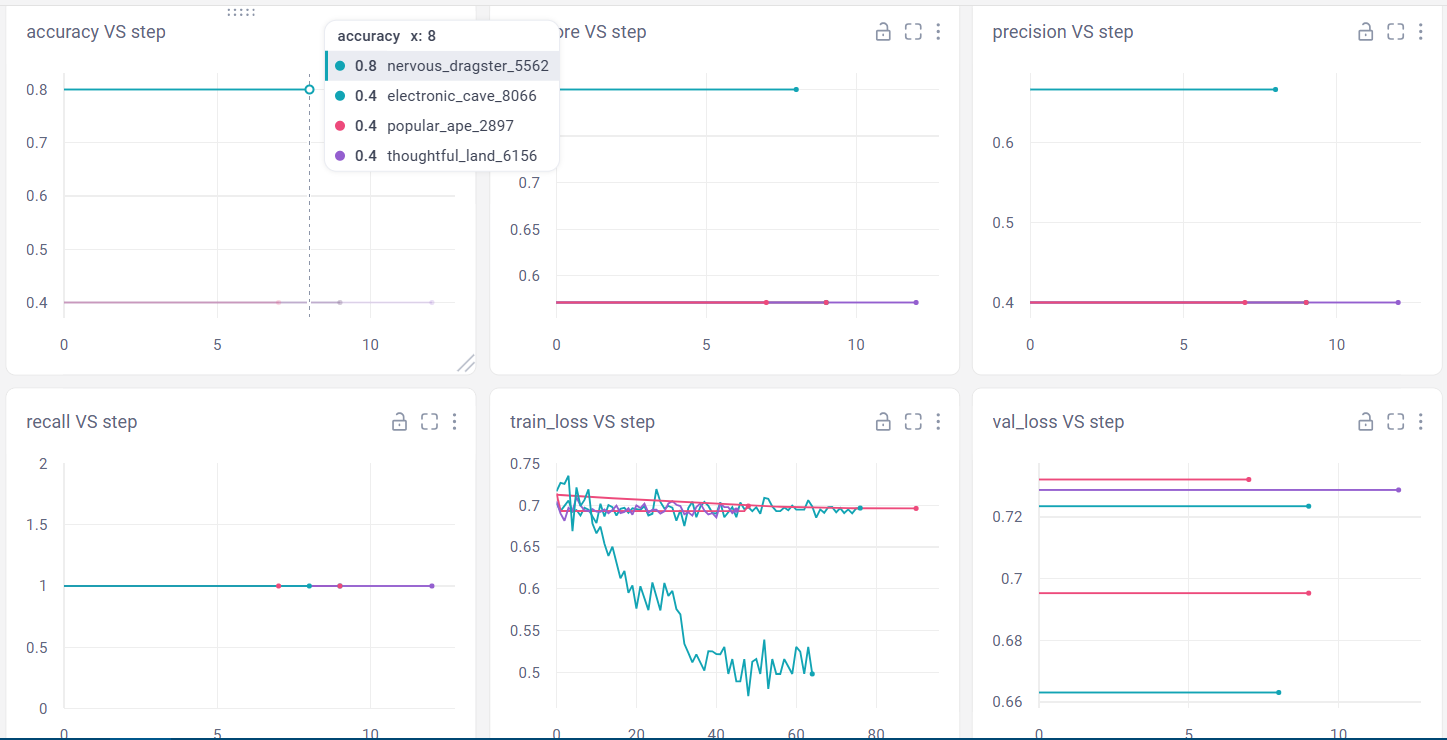

The gap between the training loss (decreasing) and validation loss (flat) indicates the model is learning well on the training set but is not generalizing well to the validation set, so the model likely overfits the training data. Overfit can be resolved using the methods that mentioned before (regularization, dropout, early stopping, ...)


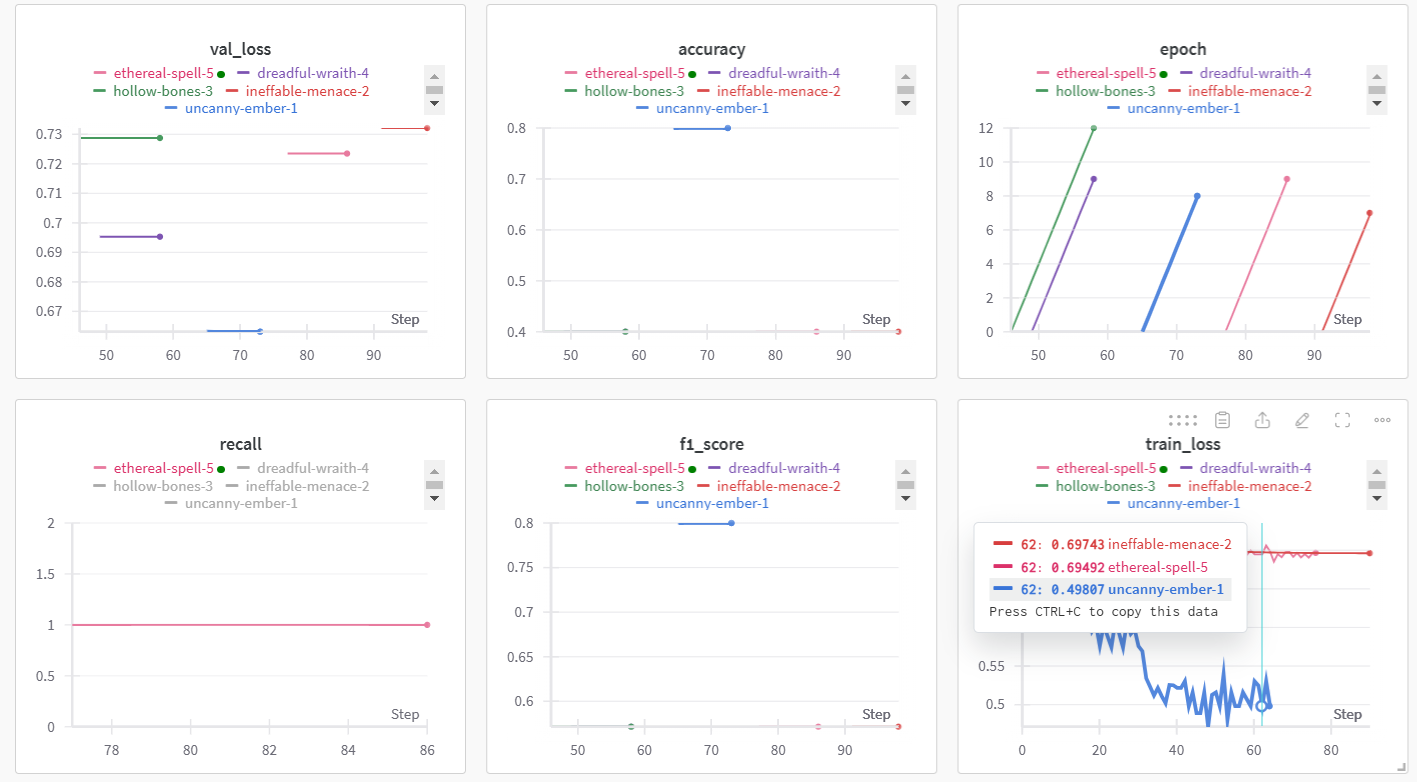